In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Colab Notebooks/kobo2020'
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/kobo2020
BetterRnnlm.pkl  ch07＿pra.ipynb                     __pycache__/
better_rnnlm.py  common/                             PyTorchTutorial1.ipynb
cbow_params.pkl  data70/                             repo6.ipynb
cbow.py          dataset/                            repo7.ipynb
ch04/            GoogleNews-vectors-negative300.bin  repo8.ipynb
ch06/            negative_sampling_layer.py          repo9.ipynb
ch07/       

In [7]:
#gensimインストール
!pip install gensim

In [25]:
#70
import sys
sys.path.append(' . . ')
import gensim
import re
import torch
import numpy as np

w2v_path = './GoogleNews-vectors-negative300.bin' #todo GoogleNews-vectors-negative300.binのパスを指定
data_path = '/content/gdrive/My Drive/Colab Notebooks/kobo2020/data70/'#todo ファイル出力ディレクトリを指定

w2v_model = gensim.models.KeyedVectors.load_word2vec_format(w2v_path, binary=True)#todo gensimでword2vecのモデルを読み込む
category2num = {"b": 0, "t": 1, "e": 2, "m": 3}

# タイトルを受け取り，単語ベクトルの平均を返す関数
def get_feature(title):
    word_list = title.split(' ')#todo タイトルをスペースで分割
    vec_list = []
    for word in word_list:
        try:
            vec = w2v_model[word]#todo wordを意味するベクトルを取得　これで良いはず？
        except KeyError:
            vec = np.zeros(300)#todo すべての要素が0のベクトルを代入
        vec_list.append(vec)    
    vec_np = np.array(vec_list) # numpyのarrayに変換
    feature = np.mean(vec_np,axis = 0)# 平均ベクトルを計算して文のベクトルを決める　axis = 0を指定しないと行ごとの出力にならない
    return feature

def get_data(fname):
    label_list = []
    feature_list = []
    with open(fname) as f:
        for line in f:
            if not line:
                continue
            data = line.split('\t')
            title = data[1]#todo dataからタイトルを取り出す
            feature = get_feature(title) 
            feature_list.append(feature)
            label = category2num[data[0]]
            label_list.append(label)
            
    feature_list = np.array(feature_list)#追加
    features =  torch.from_numpy(feature_list)#todo feature_listをtensorに変換
    label_list = np.array(label_list)#追加
    labels =  torch.from_numpy(label_list)#todo label_listをtensorに変換
    return features, labels


train_x, train_y = get_data(data_path + "train.txt")
valid_x, valid_y = get_data(data_path + "valid.txt")
test_x, test_y = get_data(data_path + "test.txt")

# 保存
torch.save(train_x, data_path + "train_x.pt")
torch.save(train_y, data_path + "train_y.pt")
torch.save(valid_x, data_path + "valid_x.pt")
torch.save(valid_y, data_path + "valid_y.pt")
torch.save(test_x, data_path + "test_x.pt")
torch.save(test_y, data_path + "test_y.pt")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [26]:
#70で作ったやつの中身を表示してみる
#データのロード
train_x, train_y = torch.load("./data70/train_x.pt"), torch.load("./data70/train_y.pt")#訓練データ
valid_x, valid_y = torch.load("./data70/valid_x.pt"), torch.load("./data70/valid_y.pt")#評価用のデータ


# 訓練データと訓練データの正解ラベルを1つにまとめる
dataset = MyDataset(train_x, train_y)#訓練データ
print(dataset.x,dataset.y)
print(dataset.data_num)
dataset2 = MyDataset(valid_x, valid_y)#評価用データ
print(dataset2.x,dataset2.y)

tensor([[ 0.0110,  0.0054, -0.0127,  ...,  0.0419,  0.0804,  0.0372],
        [ 0.0141,  0.0270,  0.0042,  ..., -0.0236,  0.0618,  0.0172],
        [ 0.0551,  0.0096,  0.0376,  ..., -0.0045, -0.0589,  0.0261],
        ...,
        [-0.0179, -0.0023, -0.0223,  ..., -0.0231,  0.0208, -0.0134],
        [-0.0198,  0.0676,  0.0149,  ...,  0.0080,  0.0089,  0.0250],
        [ 0.0593,  0.0143, -0.0203,  ...,  0.0415,  0.0484, -0.0501]],
       dtype=torch.float64) tensor([3, 0, 1,  ..., 2, 0, 0])
10671
tensor([[-0.0048,  0.0308,  0.0138,  ..., -0.0334,  0.0092, -0.0027],
        [ 0.0553, -0.0217, -0.1155,  ...,  0.0268, -0.0060, -0.0208],
        [ 0.0252,  0.0469, -0.0508,  ..., -0.0480,  0.0295, -0.0120],
        ...,
        [ 0.0217,  0.0283, -0.0270,  ..., -0.0350,  0.0066, -0.0788],
        [ 0.0099,  0.1024, -0.1198,  ...,  0.0571,  0.0285, -0.1782],
        [ 0.0339, -0.0320, -0.0495,  ..., -0.0285,  0.0614, -0.0417]],
       dtype=torch.float64) tensor([0, 0, 2,  ..., 2, 0, 0])


In [70]:
#72~77
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time

# 単層ニューラルネットワークを定義
class SingleLayerNN(nn.Module):
    def __init__(self, embedding_dim, num_labels):
        super(SingleLayerNN, self).__init__()
        #Liner層への入力は、
        #embedding_dim
        self.linear =  nn.Linear(embedding_dim,num_labels)#todo linear層を追加　300x4
        self.softmax = nn.Softmax()
    
    def forward(self, x):
        h1 = self.linear(x)#todo xをlinear層に入力 x 1x300 → h1 1x4出力
        return self.softmax(h1)#todo h1をsoftmaxしたものを返す h1から各ラベルの確率を出す


class MyDataset(Dataset):
  #データxとそれに対する正解ラベルyをメンバ変数にもつクラスMyDatase
  #データサイズを返す関数とidx番目のx,yをセットで返す関数を持つ
  #xがdata、yがlabel
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.data_num = len(x)

    def __len__(self):
        return self.data_num#todo データサイズを返す

    def __getitem__(self, idx):
        out_x = self.x[idx]#todo idx番目のxの要素を返す
        out_y = self.y[idx]#todo idx番目のyの要素を返す
        return out_x, out_y

#ランダムに取り出すデータを固定するらしい
torch.manual_seed(1)


embedding_dim = 300
num_labels = 4
NUM_EPOCH = 100

#データのロード
train_x, train_y = torch.load("./data70/train_x.pt"), torch.load("./data70/train_y.pt")
valid_x, valid_y = torch.load("./data70/valid_x.pt"), torch.load("./data70/valid_y.pt")

# データとラベルを1つにまとめる
dataset = MyDataset(train_x, train_y)

#nn.CrossEntropyLoss()で初期化
loss_fn = nn.CrossEntropyLoss()#todo 損失関数としてCrossEntropyLossを用いる


#学習するための関数
def train(model, train_loader):
    model.train()

    for data, target in train_loader:
        optimizer.zero_grad()#勾配の初期化
        #ここでエラー、dataの形が data数x4のはず、でも出力がtorch.Size([1])　→　データ読み込みの時点でミス np.meanは軸を設定しないと行ごとの値は求められない
        pred = model.forward(data.type(torch.FloatTensor))#todo dataをmodelに入力
        loss = loss_fn(pred,target)#todo predとtargetと損失関数からロスを計算
        loss.backward() # 逆誤差伝搬を実施
        optimizer.step() # パラメータを更新

#テストするための関数
def evaluation(model, data, target):
    model.eval()
    with torch.no_grad():
        #predは1334x4　列ごとの最大値を求めたい → 軸は1
        pred =  model.forward(data.type(torch.FloatTensor))#todo dataをmodelに入力 #モデルから結果　出力が四次元
        #print(pred.size())        #1334x1
        loss = loss_fn(pred,target)#todo predとtargetと損失関数からロスを計算
        pred_labels = torch.max(pred,axis = 1).indices#todo 推定したラベルを代入 どの次元がmaxか取ればいい　targetと比べる
        #pred_labelsとtargetが一致している数を求めてわる
       #print(pred_labels.size()) 
        acc = torch.sum(pred_labels == target).item()/len(pred_labels)#todo pred_labelsとtargetから正解率を計算　正答率/1334
    return loss.item(), acc


batch_size_list = [1,2,4,8,64,128]#todo バッチサイズの値のリスト．1,2,4,8,…が入る

for batch_size in batch_size_list:
    model = SingleLayerNN(embedding_dim, num_labels)
    optimizer = optim.SGD(model.parameters(), lr=0.1)#最適化

    # ミニバッチを扱うためのデータローダを作成
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    #epoch周する
    for epoch in range(NUM_EPOCH):
        start_time = time.time() # 学習開始時の時間を取得
        #学習する
        train(model, train_loader)
        took_time = time.time()-start_time#todo 学習にかかった時間を代入

        valid_loss, valid_acc = evaluation(model, valid_x, valid_y)
        
        if epoch % 10 == 0:
            print(f"batch size:{batch_size}\tepoch: {epoch}")
            print(f"train time: {took_time}")
            print(f"<valid>\tloss: {valid_loss}\tacc: {valid_acc}")
    
    print("\n================\n")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


batch size:1	epoch: 0
train time: 3.4309210777282715
<valid>	loss: 0.9587206244468689	acc: 0.800599700149925
batch size:1	epoch: 10
train time: 3.414863348007202
<valid>	loss: 0.9397221803665161	acc: 0.8013493253373314
batch size:1	epoch: 20
train time: 3.4071638584136963
<valid>	loss: 0.9378631114959717	acc: 0.8020989505247377
batch size:1	epoch: 30
train time: 3.4561259746551514
<valid>	loss: 0.936996340751648	acc: 0.8035982008995503
batch size:1	epoch: 40
train time: 3.4974474906921387
<valid>	loss: 0.9364750981330872	acc: 0.802848575712144
batch size:1	epoch: 50
train time: 3.510913372039795
<valid>	loss: 0.9360454082489014	acc: 0.8020989505247377
batch size:1	epoch: 60
train time: 3.440162420272827
<valid>	loss: 0.8930366635322571	acc: 0.8538230884557722
batch size:1	epoch: 70
train time: 3.427752733230591
<valid>	loss: 0.8867972493171692	acc: 0.8590704647676162
batch size:1	epoch: 80
train time: 3.437821388244629
<valid>	loss: 0.885372519493103	acc: 0.8598200899550225
batch size:

これは、学習済みのデータに対する評価を出力している。実行結果から、ほぼ認識精度80%くらいで推移していることがわかる。
バッチサイズが大きいほどかかる時間は短いことがわかった。

参考：https://book.mynavi.jp/manatee/detail/id=89558

今回穴埋めするにあたって、いろいろなところで引っかかってしまった。特に行列の大きさなどあまり今まで考えられてなかったのだとわかった。<br><br>
◉ 今回起きたエラーやミスをまとめておく
- np.meanについて

nn.Linearへの入力xの形状が1x1になっていた。原因はデータセットを作るところにあった。今回、ニュースタイトルを分類するにあたってニュースタイトルの文字列ベクトルの平均を取っている。ここで、np.mean(平均したいnumpy配列)と記述していたことによってエラーが起きた。行ごと（軸を設定、np.mean(平均したいnumpy配列,axis = 0)）で平均を取らないとニュースタイトル全ての平均の1x1の行列が生成されてしまう。axis = 0が行でaxis = 1が列。
<br><br>
- softmax関数について

はじめ、torch.softmax(h1)としていた。これだと、softmax関数を呼んでいる。これでも一応h1の形状を変化させれば行けると思うけどあまり綺麗な感じがしないし少し面倒くさい。<br>
レイヤを初期化 → レイヤを組み合わせる → 順伝播 → 逆伝播で勾配出す → stepごとに重み更新<br>
がいつもの流れなので、<br>
Affineレイヤ → Softmaxレイヤ<br>
の組み合わせを作るのが多分自然。Softmaxレイヤは、torch.nnに実装されている。なのでまず、コンストラクタを設定するところでself.softmax = nn.Softmax()をして初期化する。その後forward関数でself.softmax(h1)を返すようにする
<br><br>
- ラベルを出力することについて

この問題では、推論した結果最も確率が高いラベルをpredに出力している。テンソルで最も確率が高いものを求めるとき、<br>
print(torch.max(a,axis = 0).indices)
とかく。ここで注意することは、① 軸を設定して行ごとの値を求めること、② torch.maxは、二つのテンソル（最大値の値のvaluesのテンソルと最大値のインデックスindicesのテンソル）を返り値にもつ。predは、データ数xラベル数の大きさの一つのテンソルである。このため、最大値のインデックスのテンソルをpredに代入しなければならなかった。
<br><br>

- 認識精度の計算について

今まであまりよく考えてなかった。認識精度の計算は、出力されたラベルの集まりと正解ラベルを比較し、正解数を出して全体の数で割って正答率を算出する。torch、numpy共に、大きさの同じ値が異なる行列の要素を比較して等しいところはTrue、異なるところはFalseとなる行列を出力する機能を持っている。True = 1であることを利用して行列の和を求める。その和を全体の要素数で割ることで正答率を出す。ただし、テンソルの和を求めるときtorch.sum()を使用するとテンソルで返ってくる。値を取り出さないと使えないので、torch.sum(テンソル).item()として、和一つの要素を取り出さなければならない。
したがって<br>
acc = torch.sum(a == b).item()/len(a)<br>
で認識精度は求められる。



いろいろテスト。今回引っかかったところ

In [24]:
#参考：https://qiita.com/s_wing/items/f7d9db1a6a753aca76ae
#各インデックスにおいて1から9までの値をランダムに持つ大きさ100のndarrayを2つ生成
import numpy as np

a = np.random.randint(1,10,100)
b = np.random.randint(1,10,100)

print(a == b)
print(np.sum(a == b))#ペアの数
print(np.sum(a == b)/len(a))#あってた数

[ True False False False False False False False False False False  True
 False False  True  True False False False  True False False  True False
 False False False False False False  True False False  True False False
  True False False False False False False  True False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False]
12
0.12


In [48]:
#テンソルでacc
import torch
a = torch.randint(0,9,(100,1))
b = torch.randint(0,9,(100,1))
#print(a == b)
#print(torch.sum(a == b))
#値のみ(一つだけ)を取り出したいときはitem()を使う
print(torch.sum(a == b).item())
print(torch.sum(a == b).item()/len(a))
#print(a.item())　＃これだとエラー　item()は一つしか取り出せない
print(len(a))

11
0.11
100


In [68]:
#テンソルの最大値を取る
import torch
a = torch.randn(4,4)
print(a)
print(torch.max(a))
print(torch.max(a,axis = 1)) #軸が0で行、軸が1で列、値そのままのテンソルvaluesとインデックスのテンソルを返すindicesがある。テンソルとして扱いたいときは片方を取り出す
print(torch.max(a,axis = 0).indices)


tensor([[-0.4820,  0.4191, -0.2410, -1.1142],
        [ 2.2411, -1.3328,  0.2092,  1.0699],
        [ 0.5820,  0.8924,  3.2287,  0.9274],
        [ 1.1350,  0.7962,  0.7209, -2.1556]])
tensor(3.2287)
torch.return_types.max(
values=tensor([0.4191, 2.2411, 3.2287, 1.1350]),
indices=tensor([1, 0, 2, 0]))
tensor([1, 2, 2, 1])


# 7章の課題

In [3]:
#7.4.1入力データの反転
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq

#読み込み
(x_train,t_train),(x_test,t_test) = sequence.load_data('addition.txt')
# ここで反転
x_train,x_test = x_train[:,::-1],x_test[:,::-1]
char_to_id,id_to_char = sequence.get_vocab()

#ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = Seq2seq(vocab_size,wordvec_size,hidden_size)
optimizer = Adam()
trainer = Trainer(model,optimizer)


acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train,t_train,max_epoch = 1,batch_size = batch_size,max_grad = max_grad)

  correct_num = 0
  for i in range(len(x_test)):
    question,correct = x_test[[i]],t_test[[i]]
    verbose = i <10
    correct_num += eval_seq2seq(model,question,correct,id_to_char,verbose)

  acc = float(correct_num) / len(x_test)
  acc_list.append(acc)
  print('val acc %.3f%%' % (acc*100))


| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.52
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 4[s] | loss 1.91
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.86
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.84
| epoch 1 |  iter 161 / 351 | time 9[s] | loss 1.80
| epoch 1 |  iter 181 / 351 | time 11[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 12[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 13[s] | loss 1.77
| epoch 1 |  iter 241 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 16[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 17[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 18[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 19[s] | loss 1.74
| epoch 1 |  iter 341 / 351 | time 21[s] | loss 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1000
---
Q  48

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.48
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.20
| epoch 1 |  iter 61 / 351 | time 4[s] | loss 1.99
| epoch 1 |  iter 81 / 351 | time 5[s] | loss 1.89
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.82
| epoch 1 |  iter 121 / 351 | time 8[s] | loss 1.82
| epoch 1 |  iter 141 / 351 | time 9[s] | loss 1.80
| epoch 1 |  iter 161 / 351 | time 10[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 12[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 13[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 16[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 17[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 19[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 20[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 21[s] | loss 1.73
| epoch 1 |  iter 341 / 351 | time 23[s] | loss 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1013
---
Q  4

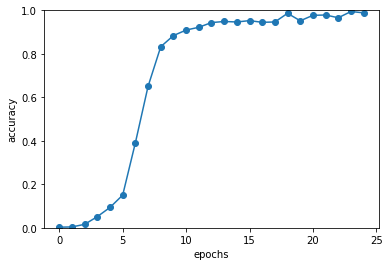

In [2]:
#7.4.1入力データの反転+7.4.2
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq

#読み込み
(x_train,t_train),(x_test,t_test) = sequence.load_data('addition.txt')
# ここで反転
x_train,x_test = x_train[:,::-1],x_test[:,::-1]
char_to_id,id_to_char = sequence.get_vocab()

#ハイパーパラメータの設定
vocab_size = len(char_to_id)#13
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = PeekySeq2seq(vocab_size,wordvec_size,hidden_size)
optimizer = Adam()#最適化
trainer = Trainer(model,optimizer)#学習するクラス

#
acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train,t_train,max_epoch = 1,batch_size = batch_size,max_grad = max_grad)

  correct_num = 0
  for i in range(len(x_test)):
    question,correct = x_test[[i]],t_test[[i]]
    verbose = i <10
    correct_num += eval_seq2seq(model,question,correct,id_to_char,verbose)

  acc = float(correct_num) / len(x_test)
  acc_list.append(acc)
  print('val acc %.3f%%' % (acc*100))

# グラフ
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

# 感想
今回の章では、言語生成と翻訳機の仕組みを学んだ。翻訳機はエンコーダとデコーダの二つのRNNを使うことで実現できる。エンコーダで問題と答えを学習、デコーダで学習した結果を用いて文章を生成している。<br>
今回認識精度をあげる工夫をすることで<br>
10% → 50% → 98%<br>
と顕著に精度が上がった。一つ目の工夫は入力を反転するReverse。本によると、理論的にはわかっていないが直感的には、処理の順番が変化してより勾配が伝わるらしい。もう一つの工夫はデコーダのLSTMレイヤ全てにエンコーダの出力hを入力するというもので、覗き見（Peeky）という。<br>
このPeekyをするとき、入力のxは、二つのベクトルを結合したものになるらしい。ここまでのディープラーニングへの入力で和を取ったり、結合したりする操作を見るけど、それで精度が上がるのがあまり直感的にあまり理解ができない。例えば、自然言語処理100本ノックの方では、文章のベクトルを取るとき、単語ベクトルの和としているけどその理由がよく分からない。全然意味が違くてもたまたま同じ和になってしまうこととかあるのではないだろうか。<br>
かといって代案も思いついてるわけではないけど、改良の余地がありそうに感じた。